In [1]:
import torch

# 나이브 베이즈
: 출력변수들이 주어졌을 때, 입력변수들의 조건부 독립이라는 가정하에 출력변수에 대한 조건부 확률을 추측한다.

- 나이브 베이즈 분류기는 베이즈 정리를 기반으로 한 확률적 분류 알고리즘이다.
- 새로운 데이터가 주어졌을 때, 각 클래스에 속할 확률을 계산한다. 가장 높은 확률을 가진 클래스로 데이터를 분류한다.
- '데이터가 독립적이다.'라는 가정 하에 이루어지기 때문에, 소량의 데이터에서도 효과적이다. 또한 예측 및 학습속도가 빠르다.(ex. 스펨메일 분류 등)

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = GaussianNB()

model.fit(X_train, y_train) # 모델 학습

y_pred = model.predict(X_test)

acc = model.score(X_test, y_test) # 해당 score로 정확도 판단
acc

1.0

In [12]:
# 유방암 데이터 분석, 분류 그래프 작성
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc

dt = load_breast_cancer()
X = dt.data
y = dt.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
gnb = GaussianNB() # 가우시안 NB
gnb.fit(X_train, y_train)

GaussianNB()

In [16]:
bnb = BernoulliNB(binarize=True) # 바이너리 NB
bnb.fit(X_train, y_train)

BernoulliNB(binarize=True)

In [18]:
print('가우시안 NB Score : ', gnb.score(X_test, y_test))
print('바이너리 NB Score : ', bnb.score(X_test, y_test))
# 각 NB에 따른 정확도값 확인

가우시안 NB Score :  0.9736842105263158
바이너리 NB Score :  0.6754385964912281


In [21]:
y_pred = gnb.predict(X_test) # 클래스 레이블 예측
y_pred_p = gnb.predict_proba(X_test) # 클래스 확률 예측

print('confusion_matrix : ', confusion_matrix(y_test, y_pred))
print('accuracy_score : ', accuracy_score(y_test, y_pred))
print('precision_score : ', precision_score(y_test, y_pred))
print('recall_score : ', recall_score(y_test, y_pred))
print('f1_score : ', f1_score(y_test, y_pred))

confusion_matrix :  [[40  3]
 [ 0 71]]
accuracy_score :  0.9736842105263158
precision_score :  0.9594594594594594
recall_score :  1.0
f1_score :  0.9793103448275862


In [35]:
# ROC 곡선 및 AUC
y_pred = gnb.predict(X_test)
y_pred_p_gnb = gnb.predict_proba(X_test)[:,1] # Positive class probability

y_pred = bnb.predict(X_test)
y_pred_p_bnb = bnb.predict_proba(X_test)[:,1]

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_p_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

fpr_bnb, tpr_bnb, _ = roc_curve(y_test, y_pred_p_bnb)
roc_auc_bnb = auc(fpr_bnb, tpr_bnb)

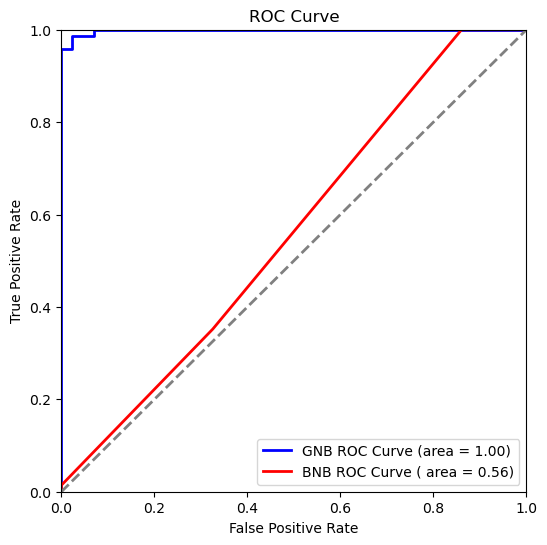

In [37]:
plt.figure(figsize=(6, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label='GNB ROC Curve (area = %0.2f)'%roc_auc_gnb)
plt.plot(fpr_bnb, tpr_bnb, color='red', lw=2, label='BNB ROC Curve ( area = %0.2f)'%roc_auc_bnb)
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

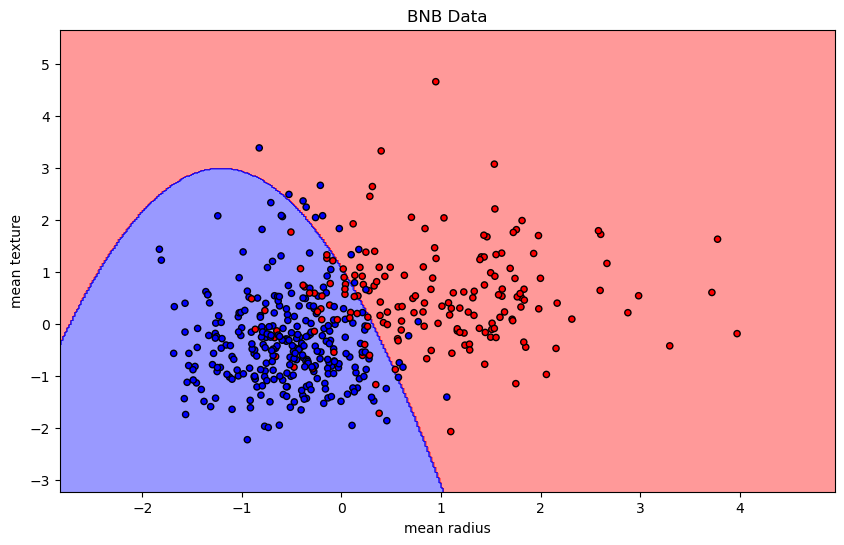

In [50]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

X_selected = X[:, :2] # 만약 1, 2번 특성이 중요한 데이터라고 한다면

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['red', 'blue']))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k', s=20, cmap=ListedColormap(['red', 'blue']))
plt.title('BNB Data')
plt.xlabel(dt.feature_names[0])
plt.ylabel(dt.feature_names[1])
plt.show()

# Value Error : X has 2 features, but GaussianNB is expecting 3- features as input 오류 발생
# 기존 유방암 데이터에서 30개의 특성을 가진다. 시각화를 위해 2개의 피처만 사용해야 한다.
